## Simulation und Modellierung WS 16/17 Uebung 07 : 
### Abgabe zum 11.12.2016

### <u>Aufgabe 1</u> Erste Schritte mit Git (3P)

Ziel dieser Aufgabe ist, die Lösung dieses kompletten Aufgabenblattes bei einem Git-Filehost (github) online zu stellen. An der hochgeladenen Version sollen Sie dann noch mindestens eine Änderung vornehmen.

Nun der Reihenfolge nach: 
* Erstellen Sie einen Account bei Github mit einem `username`

  https://github.com/
 
  Erstellen Sie dort per Mausklick ein neues Repository, z.B. `my_repo`. (unter `new repository`)

* Installieren Sie git auf Ihrem Arbeitsrechner:

  #### Linux:
  
  `yum install git`
  
  `apt-get install git`
  
  `zypper in git`

  #### Mac:
  
  `brew install git`
  
  https://git-scm.com/download/mac
  
  #### Windows:
  
  http://git-for-windows.github.io//

  Setzen Sie dann eventuell Namen und Adresse.
  
  `git config --global user.name "Your Name"`
  
  `git config --global user.email you@example.com`


* Initialisieren Sie git in einem neuen Ordner. Fügen Sie `my_repo.git` als origin hinzu. Speichern Sie dieses notebook im neuen Ordner. Führen Sie `git add .`, `git commit -m "  "` und `git push origin master` aus. Das alles geht im Terminal folgendermaßen:

  ```bash
      mkdir neuer_ordner
      cd neuer_ordner
      git init
      git remote add origin https://username@bitbucket.org/username/my_repo.git
      cp /path/to/notebook/my_notebook.ipynb my_notebook.ipynb
      git add .
      git commit -m "Dieses notebook ist die Hausaufgabe Blatt 7, zunaechst unausgefuellt."
      git push origin master  
  ```
  
  Sehen Sie nach, ob Ihr notebook online ist.

* Spielen Sie mit `git status`, `git log`, `git branch -av` .. herum und klicken Sie im Webfilehost herum, bis Sie sich ein wenig auskennen. Schreiben Sie Fragen für die Übung auf.

* Nehmen Sie nun lokal auf Ihrem Rechner Änderungen am notebook vor, zum Beispiel indem Sie die Hausaufgaben lösen. Ändern Sie dies wie oben online: `git add .`, `git commit -m "  "`, `git push origin master`. Achten Sie auf sinnvolle commit-Kommentare.
  
  ```bash
      git add .
      git commit -m "Aufg. 1 geloest, es gibt noch ein Problem mit dem Vorzeichen von h."
      git push origin master  
  ```

Senden Sie den https-Repository-Pfad an frpeter (at) uni-potsdam.de.

### <u>Aufgabe 2</u> Das Lineare Least Squares Problem (7P)

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung mit den von Ihnen gefundenen Koeffizienten erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen die Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder den Wertebereich von $x$ explizit berechnen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

Der Kegelschnitt ist eine geschlossene Kurve (Kreis oder Ellipse)


C:\Users\yanni_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: invalid value encountered in sqrt
C:\Users\yanni_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: RuntimeWarning: invalid value encountered in sqrt


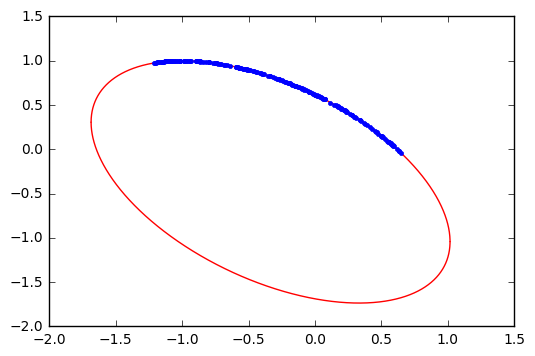

In [102]:
from pylab import *
import numpy as np

data = np.loadtxt("orbit.dat")
x_dat= data[:,0]
y_dat= data[:,1]

A_mat=np.zeros((200,5))
A_mat[:,0]=x_dat**2
A_mat[:,1]=x_dat*y_dat
A_mat[:,2]=y_dat**2
A_mat[:,3]=x_dat
A_mat[:,4]=y_dat

B_mat=np.ones((200))

C_mat=linalg.solve(A_mat.T.dot(A_mat), A_mat.T.dot(B_mat))

A=C_mat[0]
B=C_mat[1]
C=C_mat[2]
D=C_mat[3]
E=C_mat[4]

con_sec=B**2-4*A*C

if con_sec < 0:
    print("Der Kegelschnitt ist eine geschlossene Kurve (Kreis oder Ellipse)")
elif con_sec == 0:
    print("Der Kegelschnitt ist eine Parabel")
else:
    print("Der Kegelschnitt ist eine Hyperbel")

x=np.linspace(-2,3, 1000000)    
p=(B*x+E)/C
q=(D*x+A*x**2-1)/C
f1= -p/2 + sqrt((p**2/4)-q)
f2= -p/2 - sqrt((p**2/4)-q)

plot(x,f1, 'r')
plot(x,f2, 'r')
plot(x_dat, y_dat, '.b')
xlim(-2, 1.5)
ylim(-2, 1.5)
show()

### <u>Zusatzaufgabe</u> (2P)

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Containern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert. *Hinweis* : wandeln Sie `x` und `y` in `numpy` arrays um.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen.
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.

In [129]:
def polyfit(x,y,N=0):
    """
        Polyfit findet die Koeffizientenmatrix ausgehend von einer 
    
    """
    x_dat = np.array(x)
    y_dat = np.array(y)
    
    m = len(y)
    
    A_mat= np.zeros((m,N+1))
    for i in range(N+1):
        A_mat[:,i] = x_dat**i
        
    C_mat = np.linalg.solve(A_mat.T.dot(A_mat), A_mat.T.dot(y_dat))
    
    return(C_mat)

In [133]:
"""Demonstration an einem Polynom mit bekannten Koeffizienten"""

x= np.linspace(-10,10,100)
y= 2+ 4*x+ 3*x**2

print(polyfit(x,y,N=2))

[ 2.  4.  3.]


In [137]:
"""Test an orbit.dat"""

data = np.loadtxt("orbit.dat")
x_dat= data[:,0]
y_dat= data[:,1]

print(polyfit(x_dat, y_dat))

[ 0.61802298 -0.72126693 -0.36183388 -0.10547194 -0.06012141  0.09348771
  0.00265053 -0.18631296 -0.12380988  0.01374232  0.01898645]
